In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'gender_submission.csv']


In [132]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)


import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [133]:
fsize = (15,7)

In [134]:
sns.set_style("whitegrid")

data = pd.read_csv("../input/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [135]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

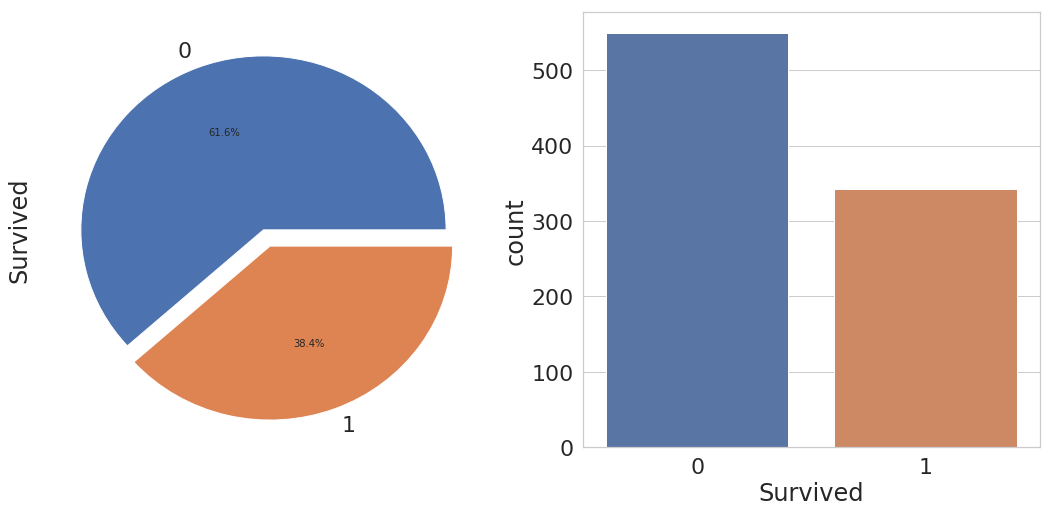

In [137]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0,.1,],ax=ax[0], autopct='%1.1f%%')
sns.countplot('Survived', data=data, ax=ax[1])

Text(0.5,1,'Sex:Survived vs Dead')

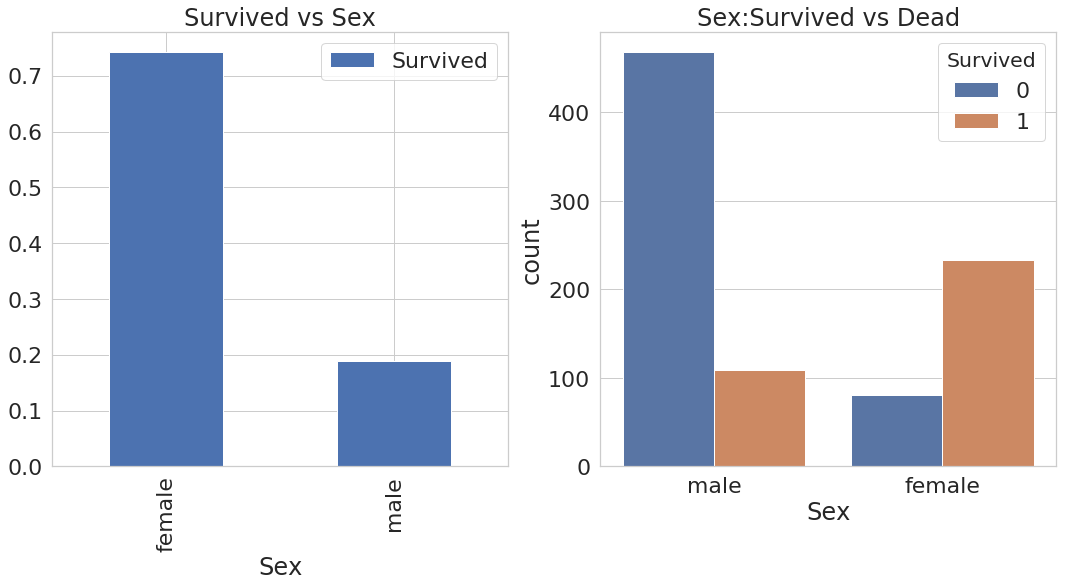

In [138]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax=ax[0])

ax[0].set_title("Survived vs Sex")
sns.countplot("Sex", hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Sex:Survived vs Dead")

In [139]:
data[['Sex', "Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [140]:
pd.crosstab(data.Sex, data.Survived, margins=True)

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


In [141]:
pd.crosstab(data.Sex, data.Survived, margins=True, normalize=True)

Survived,0,1,All
Sex,,,
female,0.090909,0.261504,0.352413
male,0.525253,0.122334,0.647587
All,0.616162,0.383838,1.000000


In [142]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0.5,1,'Pclass: Survived, vs Dead')

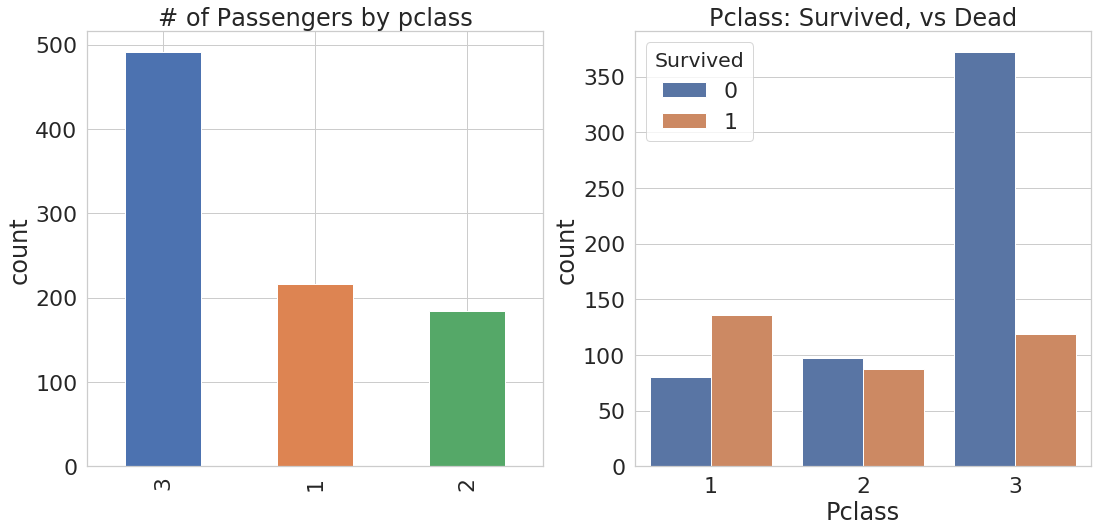

In [143]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
data["Pclass"].value_counts().plot.bar(ax=ax[0])
ax[0].set_title("# of Passengers by pclass")
ax[0].set_ylabel("count")

sns.countplot('Pclass', hue="Survived", data=data, ax=ax[1])
ax[1].set_title("Pclass: Survived, vs Dead")

In [144]:
pd.crosstab(data.Pclass, data.Survived, margins=True, normalize=True)

Survived,0,1,All
Pclass,,,
1,0.089787,0.152637,0.242424
2,0.108866,0.097643,0.206510
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1.000000


In [145]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True, )

Pclass             1    2    3  All
Sex    Survived                    
female 0           3    6   72   81
       1          91   70   72  233
male   0          77   91  300  468
       1          45   17   47  109
All              216  184  491  891

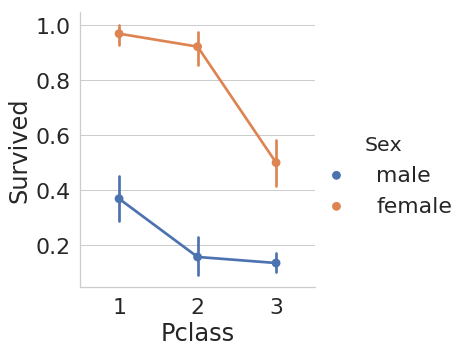

In [146]:
sns.factorplot(x="Pclass", y="Survived", hue="Sex",data=data)

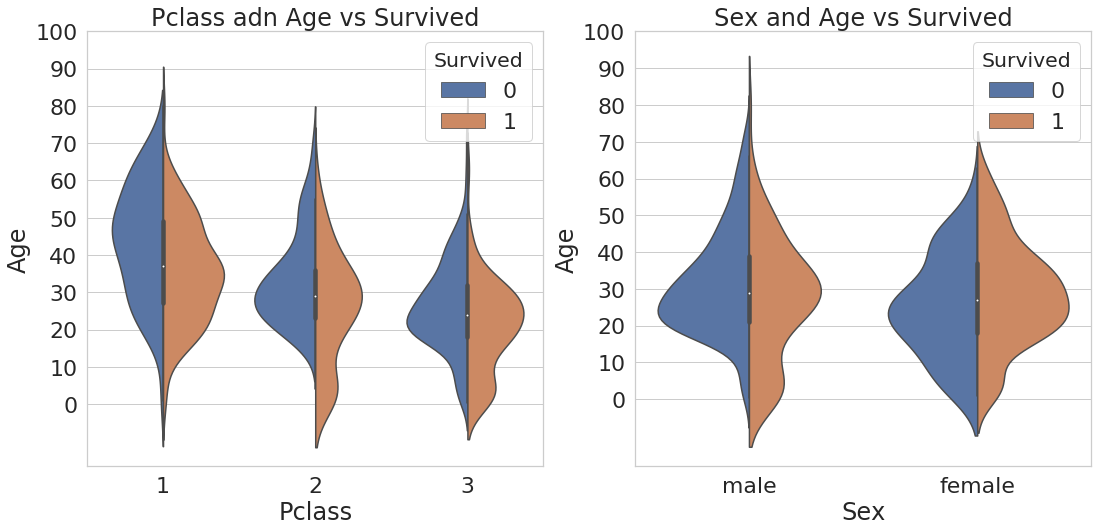

In [147]:
fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived",data=data,split=True, ax=ax[0])

ax[0].set_title("Pclass adn Age vs Survived")
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue="Survived", data=data, split=True, ax=ax[1])

ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0,110,10))

Text(0,0.5,'count')

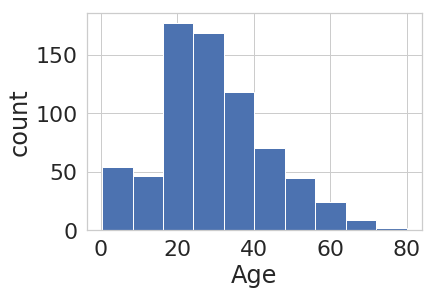

In [148]:
data['Age'].hist()
plt.xlabel("Age")
plt.ylabel("count")

Text(0,0.5,'count')

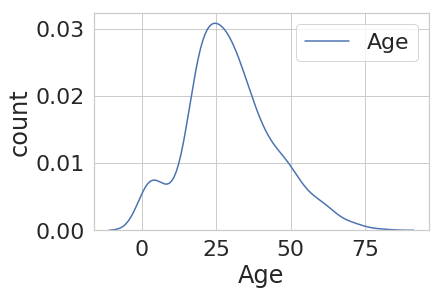

In [149]:
sns.kdeplot(data.Age)
plt.xlabel("Age")
plt.ylabel("count")

In [150]:
data[data["Survived"]==1]["Age"].head()

1    38.0
2    26.0
3    35.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [151]:
data.loc[data["Survived"]==1]["Age"].head()

1    38.0
2    26.0
3    35.0
8    27.0
9    14.0
Name: Age, dtype: float64

Text(0,0.5,'count')

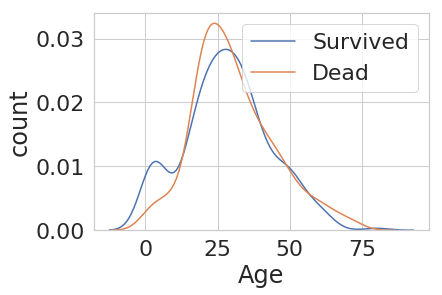

In [152]:
sns.kdeplot(data.loc[data["Survived"] == 1]["Age"], label="Survived")
sns.kdeplot(data.loc[data["Survived"] == 0]["Age"], label="Dead")
plt.xlabel("Age")
plt.ylabel("count")

In [153]:
data['Initial']=0
for i in data:
    data['Initial']=data.Name.str.extract('([A-Za-z]+)\.')

In [154]:
pd.crosstab(data.Initial,data.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [155]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [156]:
data.groupby('Initial')['Age'].mean() #lets check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [157]:
data.iloc[:3,:3]

,PassengerId,Survived,Pclass
0,1,0,3
1,2,1,1
2,3,1,3


In [158]:
data.loc[(data.Age.isnull()), :].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss


In [159]:
data.loc[(data.Age.isnull()) & (data.Initial == 'Master') ,:].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,NaN,C,Master
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S,Master
176,177,0,3,"Lefebre, Master. Henry Forbes",male,NaN,3,1,4133,25.4667,NaN,S,Master
709,710,1,3,"Moubarek, Master. Halim Gonios (""William George"")",male,NaN,1,1,2661,15.2458,NaN,C,Master


In [160]:
data.loc[(data.Age.isnull())&(data.Initial=='Mr'),'Age']=33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [161]:
data.Age.isnull().sum()

0

In [162]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
Initial        False
dtype: bool

In [163]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

Text(0.5,1,'Survived=1')

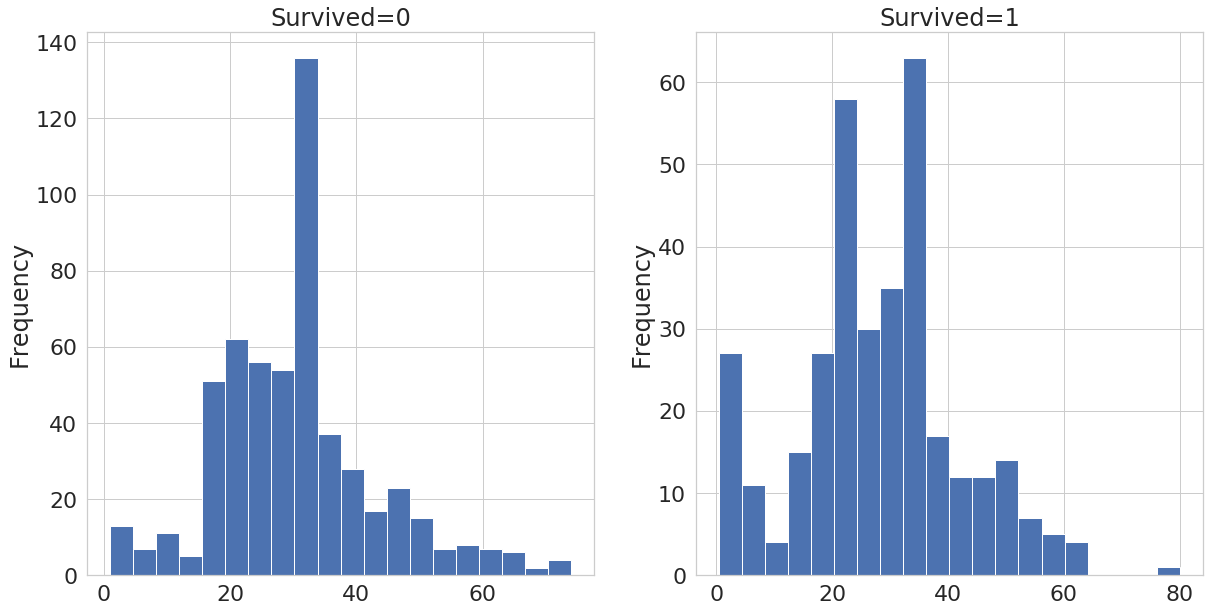

In [164]:
fig, ax = plt.subplots(1,2, figsize=(20,10))

data.loc[data["Survived"] ==0]['Age'].plot.hist(ax=ax[0], bins=20)
ax[0].set_title("Survived=0")

data.loc[data["Survived"] ==1]['Age'].plot.hist(ax=ax[1], bins=20)
ax[1].set_title("Survived=1")

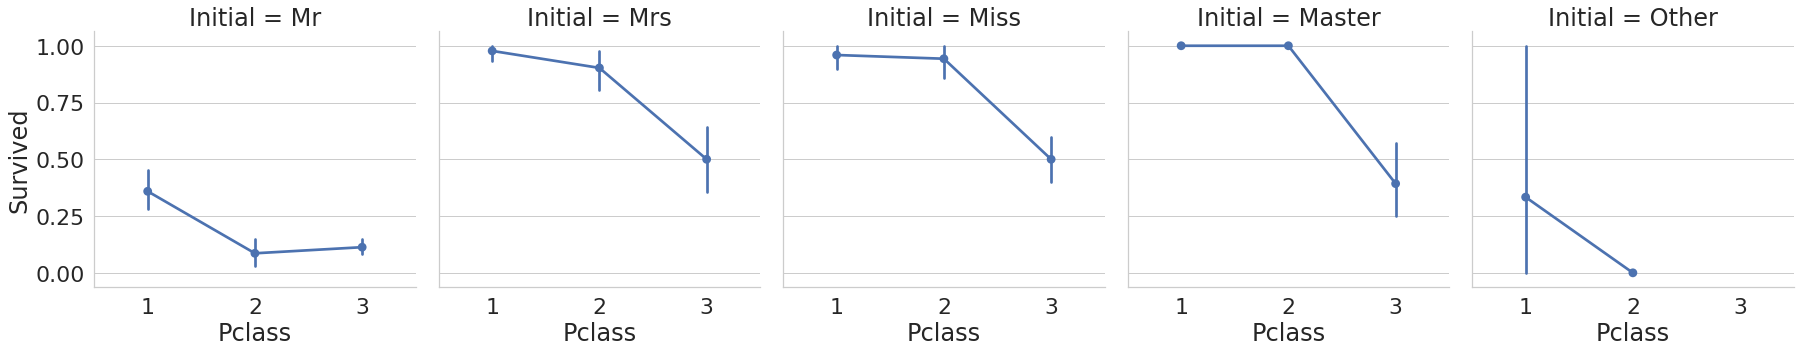

In [165]:
sns.factorplot("Pclass", "Survived", col="Initial",data=data)

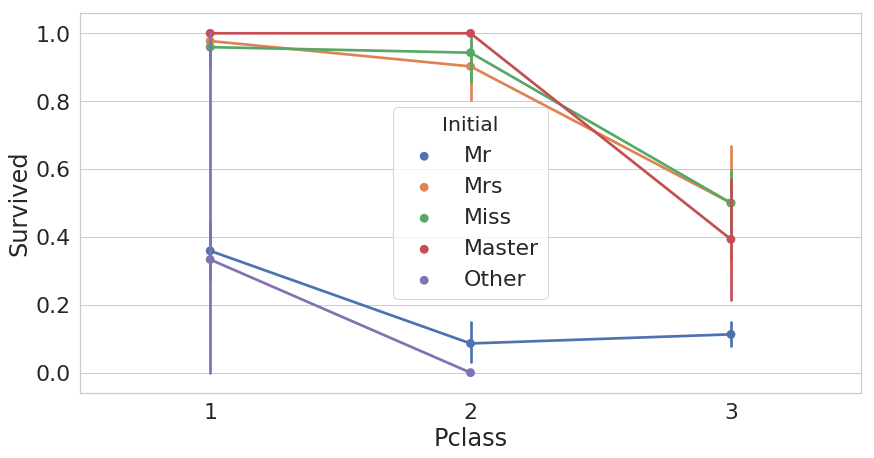

In [166]:
fig ,ax = plt.subplots(nrows=1,ncols=1,figsize=(14,7))
sns.factorplot("Pclass", "Survived", hue="Initial",data=data, ax=ax)
plt.close(2)

In [167]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived],margins=True).style.background_gradient(cmap='summer_r')

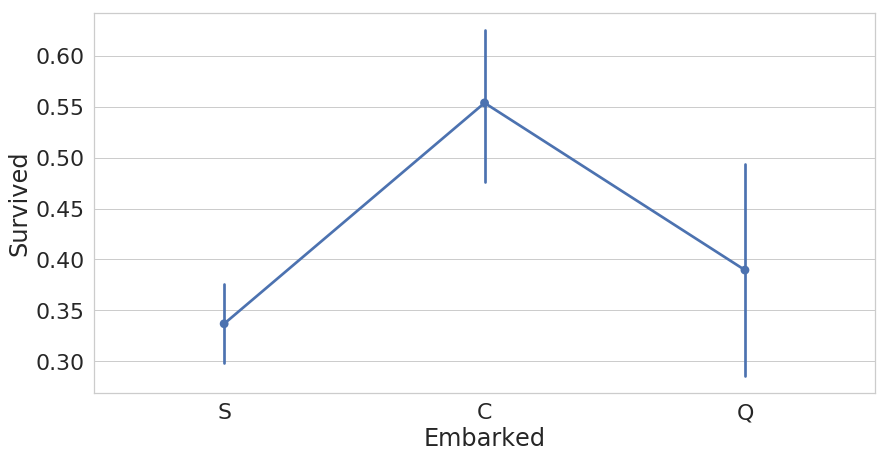

In [168]:
fig ,ax = plt.subplots(nrows=1,ncols=1,figsize=(14,7))
sns.factorplot("Embarked", "Survived", data=data, ax=ax)
plt.close(2)

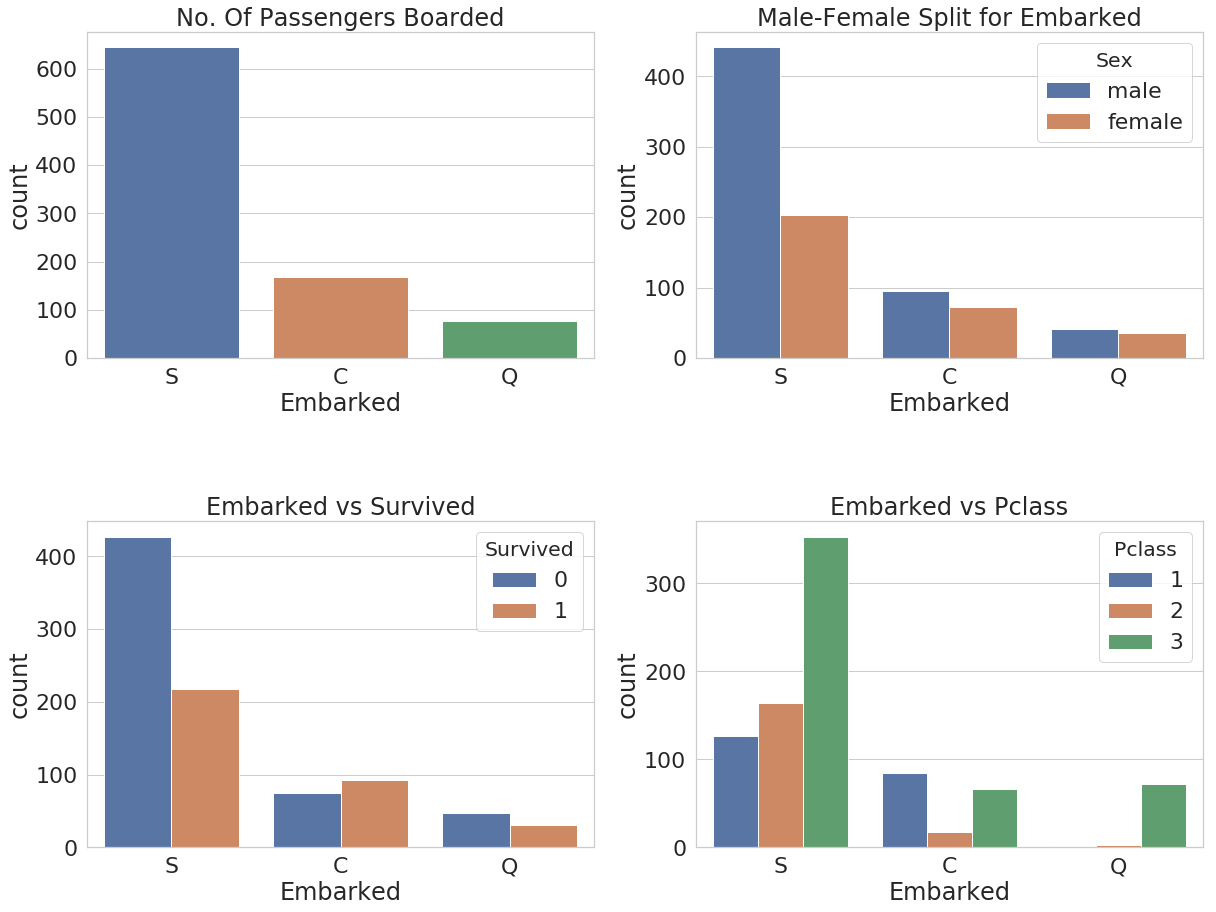

In [169]:
f,ax=plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)

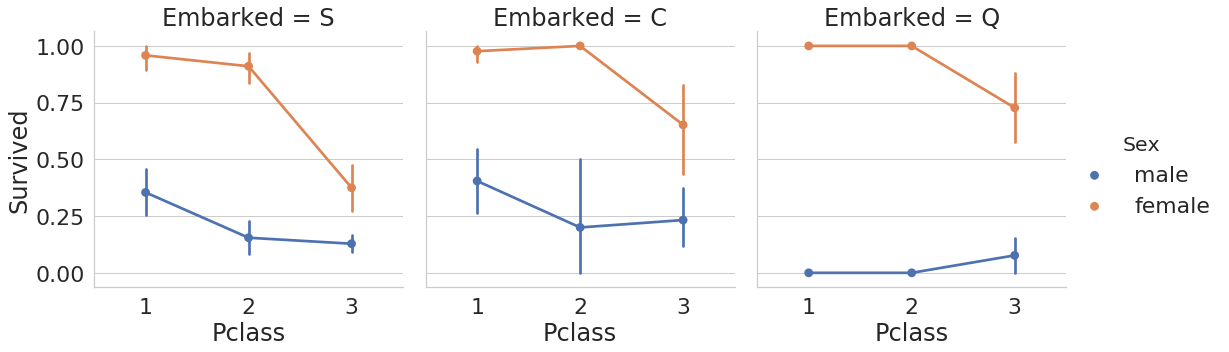

In [170]:
sns.factorplot("Pclass", "Survived", hue="Sex", col='Embarked', data=data)

In [171]:
data.isnull().sum()
data.Embarked.fillna("S", inplace=True)

In [172]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

In [173]:
pd.crosstab(data.SibSp, data.Survived, margins=True, normalize=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
SibSp,,,
0,0.446689,0.23569,0.682379
1,0.108866,0.125701,0.234568
2,0.016835,0.0145903,0.0314254
3,0.013468,0.00448934,0.0179574
4,0.016835,0.003367,0.020202
5,0.00561167,0,0.00561167
8,0.00785634,0,0.00785634
All,0.616162,0.383838,1


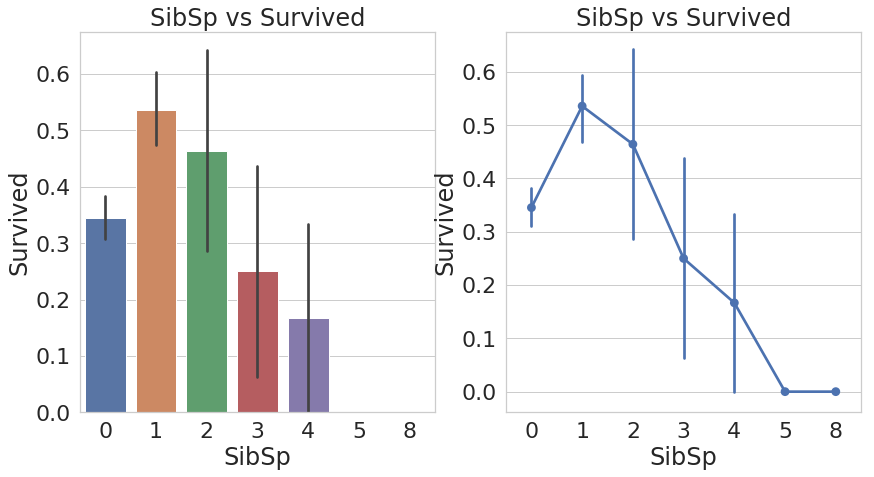

In [174]:
fig, ax = plt.subplots(1,2, figsize=(14,7))

sns.barplot("SibSp", "Survived", data=data, ax=ax[0])
ax[0].set_title("SibSp vs Survived")

sns.factorplot("SibSp", "Survived", data=data, ax=ax[1])
ax[1].set_title("SibSp vs Survived")
plt.close(2)

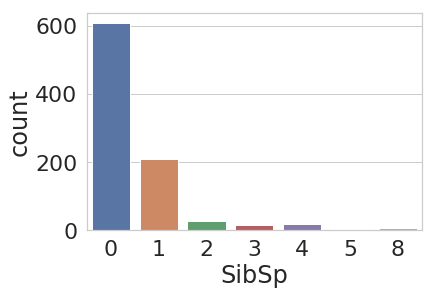

In [175]:
sns.countplot("SibSp", data=data)

In [176]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap="summer_r")

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


In [177]:
pd.crosstab(data.Parch, data.Pclass, margins=True, normalize=True).style.background_gradient(cmap="summer_r")

Pclass,1,2,3,All
Parch,,,,
0,0.182941,0.150393,0.427609,0.760943
1,0.0347924,0.0359147,0.0617284,0.132435
2,0.023569,0.0179574,0.0482604,0.0897868
3,0,0.00224467,0.003367,0.00561167
4,0.00112233,0,0.003367,0.00448934
5,0,0,0.00561167,0.00561167
6,0,0,0.00112233,0.00112233
All,0.242424,0.20651,0.551066,1


In [178]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [179]:
(data.Pclass.astype('str') + "_" + data.Sex.astype('str')).head()

0      3_male
1    1_female
2    3_female
3    1_female
4      3_male
dtype: object

In [180]:
data['new_cat_pclass_sex'] = (data.Pclass.astype('str') + "_" + data.Sex.astype('str'))

In [181]:
data.groupby("new_cat_pclass_sex")["Survived"].mean()

new_cat_pclass_sex
1_female    0.968085
1_male      0.368852
2_female    0.921053
2_male      0.157407
3_female    0.500000
3_male      0.135447
Name: Survived, dtype: float64

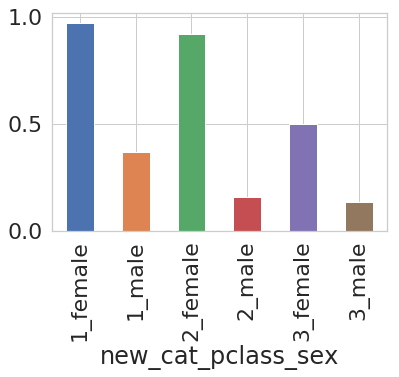

In [182]:
data.groupby("new_cat_pclass_sex")["Survived"].mean().plot.bar()

In [183]:
data['new_cat_pclass_sex_embarked'] = (data.Pclass.astype('str') + "_" + data.Sex.astype('str') + "_" + data.Embarked.astype('str'))
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3_female,3_female_S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1_female,1_female_S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3_male,3_male_S


In [184]:
sth = data.groupby('new_cat_pclass_sex_embarked')
sth.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3_female,3_female_S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1_female,1_female_S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3_male,3_male_S
5,6,0,3,"Moran, Mr. James",male,33.0,0,0,330877,8.4583,NaN,Q,Mr,3_male,3_male_Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,1_male,1_male_S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,3_male,3_male_S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,3_female,3_female_S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,2_female,2_female_C


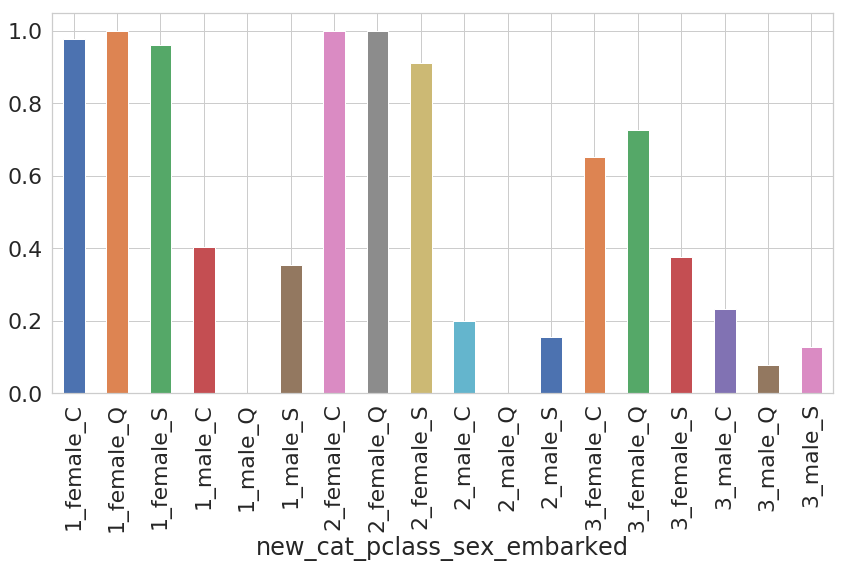

In [185]:
fig, ax = plt.subplots(1,1,figsize=(14,7))

data.groupby('new_cat_pclass_sex_embarked')["Survived"].mean().plot.bar(ax=ax)

In [186]:
data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

(0, 500)

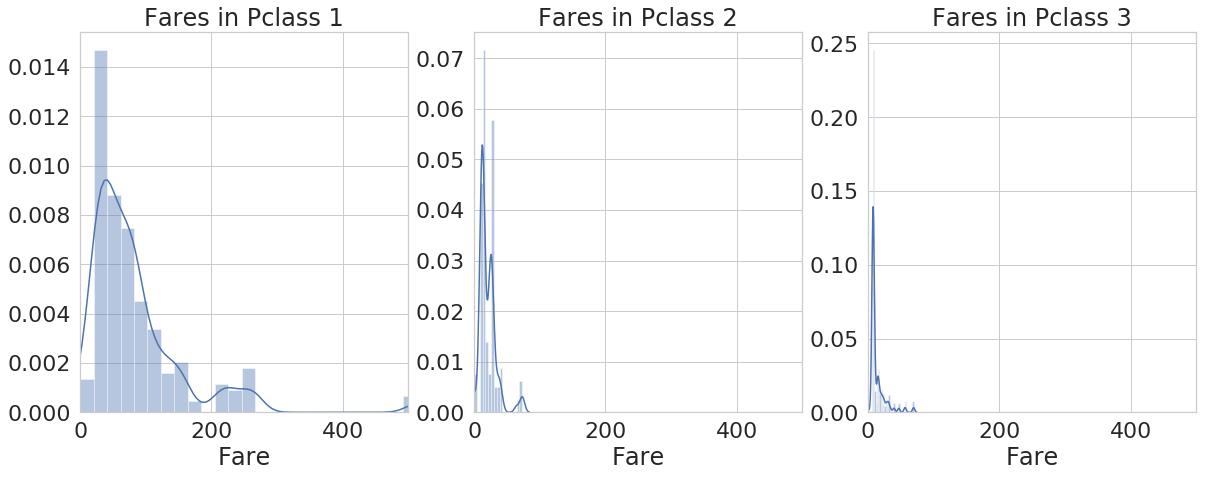

In [187]:
fig, ax = plt.subplots(1,3, figsize=(20,7))
sns.distplot(data.loc[data.Pclass == 1].Fare, ax=ax[0])
ax[0].set_title("Fares in Pclass 1")
sns.distplot(data.loc[data.Pclass == 2].Fare, ax=ax[1])
ax[1].set_title("Fares in Pclass 2")
sns.distplot(data.loc[data.Pclass == 3].Fare, ax=ax[2])
ax[2].set_title("Fares in Pclass 3")

ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
ax[2].set_xlim(0,500)                

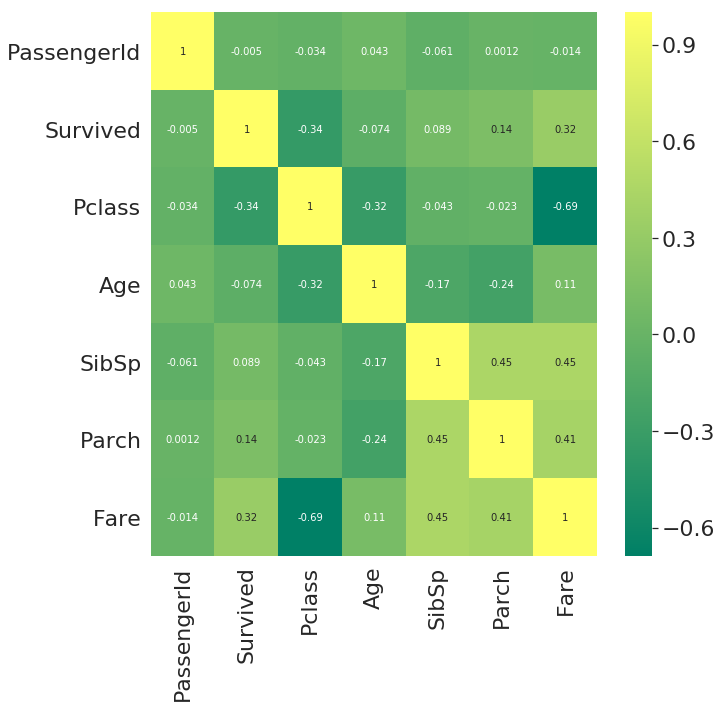

In [188]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.heatmap(data.corr(method='spearman'), annot=True, cmap='summer', ax=ax)


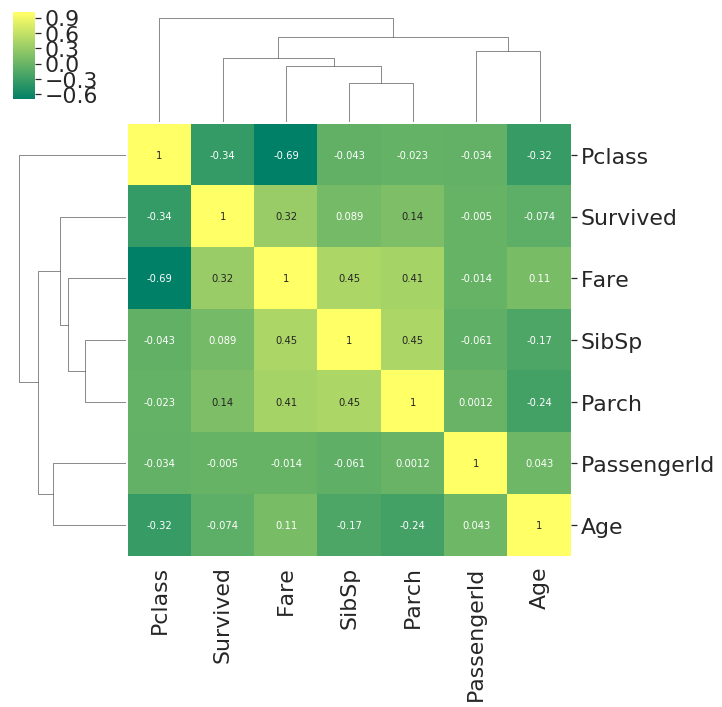

In [189]:
fig, ax = plt.subplots(1,1, figsize=(10,10))

sns.clustermap(data.corr(method='spearman'), annot=True, cmap='summer')
plt.close(1)

In [190]:
data["Age_band"] = 0

In [191]:
def divide_age_band(age):
    if age <=16:
        return 0
    elif age <= 32:
        return 1
    elif age <= 48:
        return 2
    elif age <= 64:
        return 3
    else:
        return 4

In [192]:
data["Age_band"] = data.Age.apply(divide_age_band)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3_female,3_female_S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1_female,1_female_S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3_male,3_male_S,2


In [193]:
data.Age_band.value_counts()

1    382
2    325
0    104
3     69
4     11
Name: Age_band, dtype: int64

In [194]:
# Series to dataframe
data.Age_band.value_counts().to_frame()

,Age_band
1,382
2,325
0,104
3,69
4,11


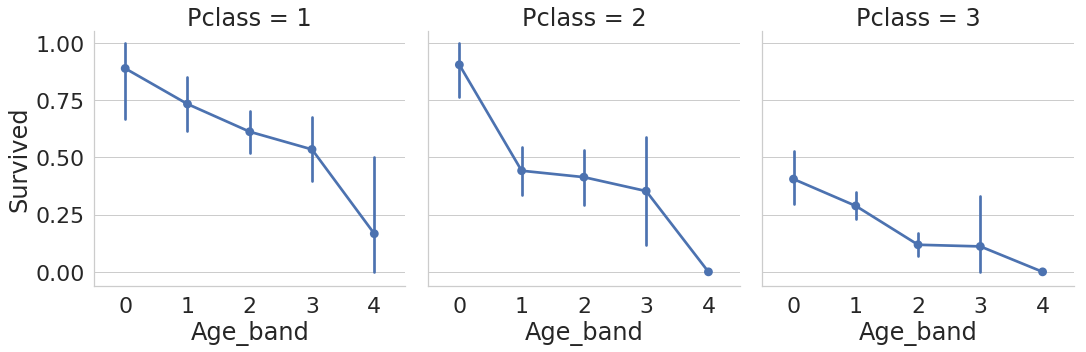

In [195]:
sns.factorplot('Age_band', "Survived", data=data, col='Pclass')

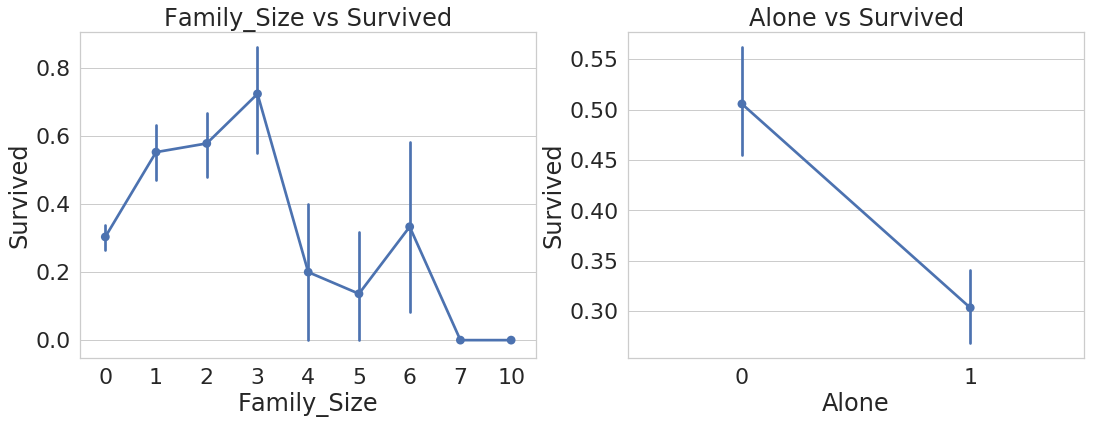

In [196]:
data['Family_Size']=0
data['Family_Size']=data['Parch']+data['SibSp']#family size
data['Alone']=0
data.loc[data.Family_Size==0,'Alone']=1#Alone

f,ax=plt.subplots(1,2,figsize=(18,6))
sns.factorplot('Family_Size','Survived',data=data,ax=ax[0])
ax[0].set_title('Family_Size vs Survived')
sns.factorplot('Alone','Survived',data=data,ax=ax[1])
ax[1].set_title('Alone vs Survived')
plt.close(2)
plt.close(3)
plt.show()

In [197]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band,Family_Size,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S,1,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C,2,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,3_female,3_female_S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1_female,1_female_S,2,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,3_male,3_male_S,2,0,1


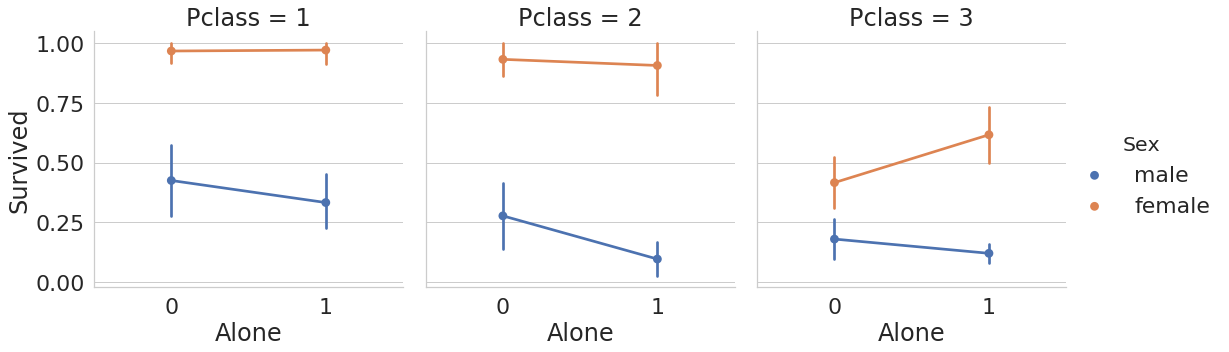

In [198]:
sns.factorplot("Alone", "Survived", data=data, hue='Sex', col='Pclass')

In [199]:
data["Fare_Range"] = pd.qcut(data['Fare'],4)
data.groupby(["Fare_Range"])["Survived"].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


In [200]:
pd.qcut(data["Fare"],6).value_counts().to_frame()

,Fare
"(-0.001, 7.775]",156
"(7.775, 8.662]",152
"(52.369, 512.329]",149
"(14.454, 26.0]",149
"(26.0, 52.369]",146
"(8.662, 14.454]",139


In [201]:
pd.cut(data["Fare"],6).value_counts().to_frame()

,Fare
"(-0.512, 85.388]",825
"(85.388, 170.776]",46
"(170.776, 256.165]",11
"(256.165, 341.553]",6
"(426.941, 512.329]",3
"(341.553, 426.941]",0


In [202]:
data[["Fare_Range", "Survived"]].groupby("Fare_Range")["Survived"].mean()

Fare_Range
(-0.001, 7.91]     0.197309
(7.91, 14.454]     0.303571
(14.454, 31.0]     0.454955
(31.0, 512.329]    0.581081
Name: Survived, dtype: float64

In [203]:
data['Age_band']=0
data.loc[data['Age']<=16,'Age_band']=0
data.loc[(data['Age']>16)&(data['Age']<=32),'Age_band']=1
data.loc[(data['Age']>32)&(data['Age']<=48),'Age_band']=2
data.loc[(data['Age']>48)&(data['Age']<=64),'Age_band']=3
data.loc[data['Age']>64,'Age_band']=4
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band,Family_Size,Alone,Fare_Range
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,3_male,3_male_S,1,1,0,"(-0.001, 7.91]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1_female,1_female_C,2,1,0,"(31.0, 512.329]"


In [204]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer')#checking the number of passenegers in each band

,Age_band
1,382
2,325
0,104
3,69
4,11


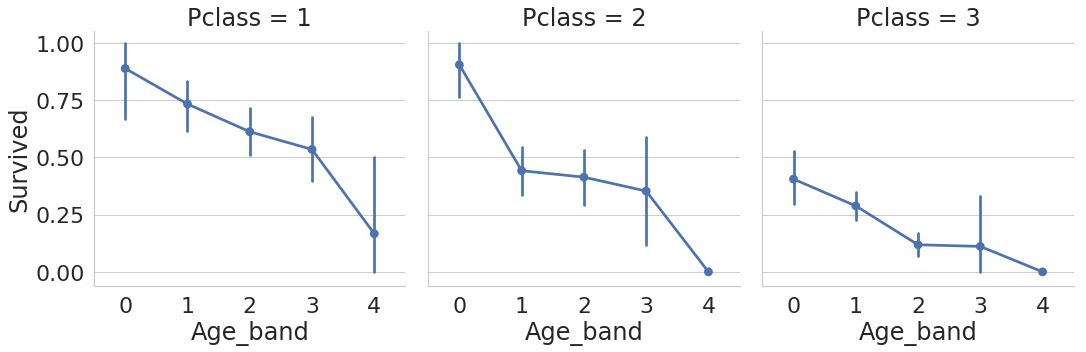

In [205]:
sns.factorplot('Age_band','Survived',data=data,col='Pclass')
plt.show()

In [206]:
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

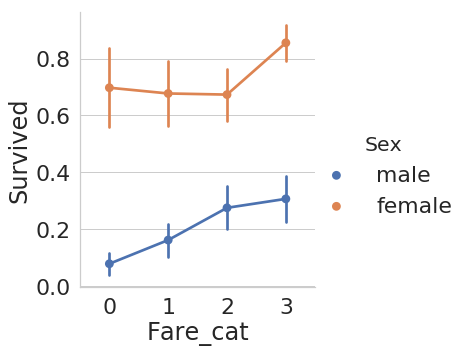

In [207]:
sns.factorplot('Fare_cat','Survived',data=data,hue='Sex')


In [208]:
data.Sex.replace(["male", "female"],[0,1],inplace=True)
data.Embarked.replace(["S", "C", "Q"],[0,1,2],inplace=True)
data.Initial.replace(["Mr", "Mrs","Miss","Master","other",],[0,1,2,3,4],inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,new_cat_pclass_sex,new_cat_pclass_sex_embarked,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,3_male,3_male_S,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,1_female,1_female_C,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,3_female,3_female_S,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,1_female,1_female_S,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,3_male,3_male_S,2,0,1,"(7.91, 14.454]",1


In [209]:
## another way to one hot encoding
from sklearn.preprocessing import LabelEncoder
#for col in ["Sex", "Embarked", "Initial"]:
#    encoder = LabelEncoder()
#    data[col] = encoder.fit_transform(data[col])

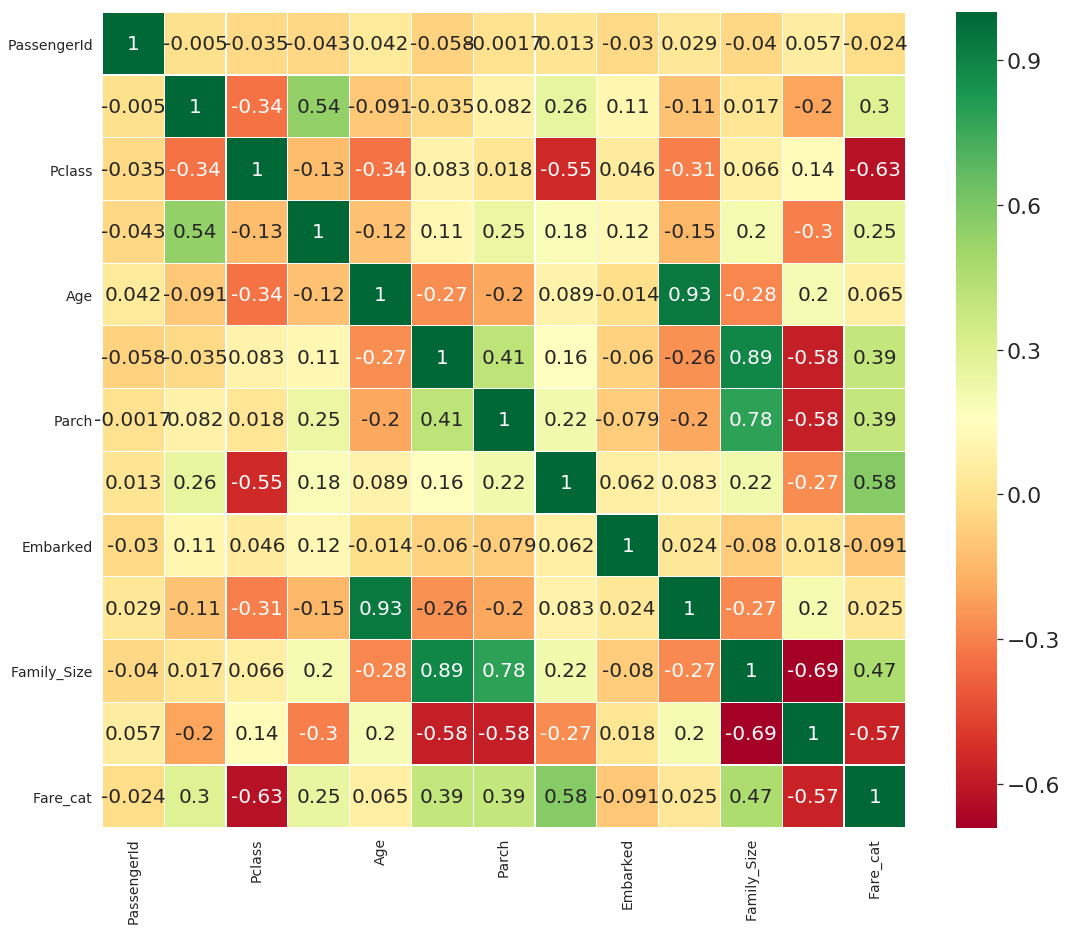

In [210]:
#data.drop(['Name','Age','Ticket','Fare','Cabin','Fare_Range','PassengerId'],axis=1,inplace=True)
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()